<a href="https://colab.research.google.com/github/motrov91/DataVisualization/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 02
###Supermarket_Sales_Analysis

## Conexion con google drive

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Configuración del ambiente**




In [33]:
#Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

global df_ventas, df_ventas_limpio

## **Importación y tratamiento de datos**

In [34]:
df_ventas = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Proyectos bootcamp/01_Supermarket_Sales_Analysis/reporte_ventas.csv', sep=',')
print('Información del dataset')
print('')
print(df_ventas.info())
print('')
duplicados = df_ventas.duplicated().sum()
print('Duplicados: {}'.format(duplicados))
reg_prueba = (df_ventas['nombre_cliente'] == 'prueba').sum()
print('Registros de prueba: {}'.format(reg_prueba))
ganancia_menor_cero = (df_ventas['total_ganancia'] <= 0).sum()
print('Ganancia menor a cero: {}'.format(ganancia_menor_cero))
print('')
valores_nulos = df_ventas.isnull().sum()
print('Valores nulos en el dataframe:')
valores_nulos

Información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non

fecha_pedido             0
fecha_envio              0
modo_envio               0
nombre_cliente           2
segmento_cliente         0
ciudad                   0
estado                   0
region                   0
departamento_producto    0
tipo_producto            0
precio_base              0
precio_unit_sin_desc     0
descuento                0
precio_unit_venta        0
cantidad_pedido          0
total_venta              0
total_ganancia           0
dtype: int64

### Función para limpiar datos

In [35]:
#Limpieza del dataframe
def limpieza_datos():
  global df_ventas, df_ventas_limpio
  #Copia del df almacenado en la variable global df_ventas_limpio
  df_ventas_limpio = df_ventas.copy()

  #Transformando fechar a datetime
  df_ventas_limpio['fecha_pedido'] = pd.to_datetime(df_ventas_limpio['fecha_pedido'], format='%Y-%m-%d')
  df_ventas_limpio['fecha_envio'] = pd.to_datetime(df_ventas_limpio['fecha_envio'], format='%Y-%m-%d')

  #Eliminación valores menores o iguales a cero columna total_ganancia
  seleccion = df_ventas_limpio[df_ventas_limpio['total_ganancia'] <= 0].index
  df_ventas_limpio.drop(seleccion, inplace= True)

  #Eliminación de registros duplicados
  seleccion = df_ventas_limpio[df_ventas_limpio.duplicated() == True].index
  df_ventas_limpio.drop_duplicates(inplace = True)

  #Eliminación de registros de prueba
  seleccion_prueba = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] == 'prueba'].index
  df_ventas_limpio.drop(seleccion_prueba, inplace= True)

  #Eliminación de valores nulos
  df_ventas_limpio.dropna(0, inplace= True)

  #visualizacion de datos
  df_ventas_limpio.info()

### Llamando la función para limpiar datos y verificando la limpieza

In [36]:
#Llamamos la funcion para que haga el proceso de limpieza de los datos
limpieza_datos()

print('')
ganancia_menor_cero = (df_ventas_limpio['total_ganancia'] <= 0).sum()
print('Ganancia menor a cero: {}'.format(ganancia_menor_cero))

duplicados = df_ventas_limpio.duplicated().sum()
print('Duplicados: {}'.format(duplicados))

reg_prueba = (df_ventas_limpio['nombre_cliente'] == 'prueba').sum()
print('Registros de prueba: {}'.format(reg_prueba))

print('')
valores_nulos = df_ventas_limpio.isnull().sum()
print('Valores nulos en el dataframe:')
valores_nulos



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7210 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64       
 13  pre

<ipython-input-35-0ff11beafdb5>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_ventas_limpio.dropna(0, inplace= True)


fecha_pedido             0
fecha_envio              0
modo_envio               0
nombre_cliente           0
segmento_cliente         0
ciudad                   0
estado                   0
region                   0
departamento_producto    0
tipo_producto            0
precio_base              0
precio_unit_sin_desc     0
descuento                0
precio_unit_venta        0
cantidad_pedido          0
total_venta              0
total_ganancia           0
dtype: int64

#**Preguntas y respuestas**


##**Pregunta 01**
#####¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

In [37]:
def pregunta_1():
  global df_ventas, df_ventas_limpio
  df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
  df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year
  df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)
  df_ventas_año = df_ventas_año.groupby('año')

  años = []
  total_ventas_agrupadas = []

  for año, venta in df_ventas_año:
    #print('{} -> {}'.format(año, venta.total_venta.aggregate('sum')))

    #Obtenemos año y total_venta_año y los agregamos a una lista de diccionarios
    #resultados.append({
    #    'año' : año,
    #    'Total_venta_año' : venta.total_venta.aggregate('sum')
    #})
    años.append(año)
    total_ventas_agrupadas.append(venta.total_venta.aggregate('sum'))

  #Creación del gráfico
  fig, eje = plt.subplots(figsize=(12,6))

  index = range(len(años))
  colores = ['#BBDEFB', '#BBDEFB', '#BBDEFB', '#1976D2']
  test = ['valor1', 'valor2', 'valor3', 'valor4']

  #Creando las barras verticales
  eje.bar(index, total_ventas_agrupadas, color = colores, width=0.9, edgecolor='none')

  años = ['2019', '2020', '2021', '2022']

  #Ubicando labels
  eje.set_xticks(index)
  eje.set_xticklabels(años)
  eje.set_yticks([])

  #Anotaciones
  eje.text(0 - 0.5,max(total_ventas_agrupadas)-200000, 'Ventas totales por año \n (2019 - 2022)', color='#424242', fontsize=15, ha='left', va='bottom')

  #Patches es la forma primitiva de la barra y lo recorremos, al recorrerlo podemos acceder a sus propiedades como color,ancho y demas.
  for bar in eje.patches:
    valor = bar.get_height()
    qtd = 'USD$ {0}'.format(valor)
    eje.text(bar.get_x()+bar.get_width()/30,valor + 20000,qtd, fontsize=10)

  # Quitamos los bordes bordes de los ejes x e y, por defecto viene en True
  eje.spines['top'].set_visible(False)
  eje.spines['right'].set_visible(False)
  eje.spines['bottom'].set_visible(False)
  eje.spines['left'].set_visible(False)


  #Dejar padding en el gráfico
  padding_x = 3
  padding_y = 200000

  #Asigna un nuevo valor al limite del eje x (padding)
  eje.set_xlim(-padding_x + 2.4, len(index)-1 + padding_x)
  eje.set_ylim(0, max(total_ventas_agrupadas) + padding_y)

  #Mensaje
  ventas_2022 = total_ventas_agrupadas[-1]
  ventas_2021 = total_ventas_agrupadas[-2]
  diferencia_ventas = (ventas_2022 - ventas_2021).round()
  crecimiento = ((diferencia_ventas * 100)/ventas_2022).round(2)

  eje.text(4, max(total_ventas_agrupadas)/1.6,
  'En 2022, las ventas en el supermercado \nsubieron aproximadamente {0}%, \ncomparado con el año anterior'
  .format(crecimiento), color="#1565C0",fontsize = 12)


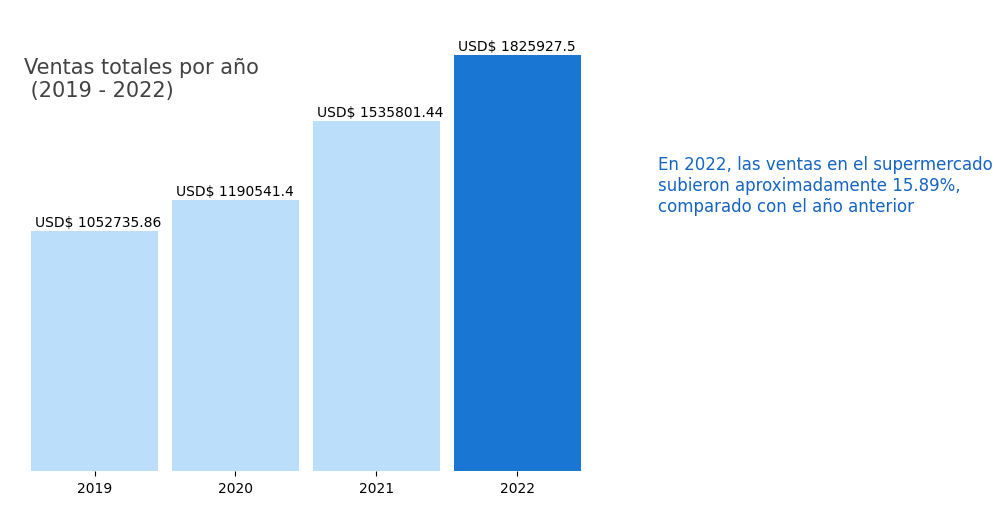

In [38]:
pregunta_1()

##**Pregunta 2**
##### ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

In [39]:
def pregunta_2():
  global df_ventas, df_ventas_limpio

  df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()
  df_top_ganancias = df_top_ganancias.groupby('tipo_producto')

  productos = []

  for producto, ganancia in df_top_ganancias:
    #print('{}-->{}'.format(producto, ganancia.total_ganancia.aggregate('sum').round(2)))
    #Obtenemos el producto y ganancia_acumulada de cada producto y los agregamos a una lista de diccionarios
    productos.append({
        'producto' : producto,
        'ganancia_acumulada' : ganancia.total_ganancia.aggregate('sum').round(2)
    })
    #productos.append(producto)
    #ganancia_acumulada.append(ganancia.total_ganancia.aggregate('sum').round(2))

  df_top_ganancias = pd.DataFrame(productos)
  df_top_ganancias.sort_values(by='ganancia_acumulada', inplace=True)
  df_top_ganancias = df_top_ganancias.tail(7)

  ejeX = df_top_ganancias['producto']
  ejeY = df_top_ganancias['ganancia_acumulada']

  #Creación del gráfico
  fig, eje = plt.subplots(figsize=(10,4))
  bars = eje.barh(ejeX, ejeY, align='center')

  #Asignamos el color a la barra con la propiedad set_facecolor()
  for i, bar in enumerate(bars):
    if i >= 3 and i <= 6:
      bar.set_facecolor('#0077b6')
    elif i == 2:
      bar.set_facecolor('#adb5bd')
    else:
      bar.set_facecolor('#0C8040')


  #con zip combinamos los dos iterables, es decir iterar mas de una lista
  for bar,valor in zip(bars, ejeY):
    #get_width obtiene el ancho de la barra, get_y obtiene la coordenada en el grafico
    eje.text(bar.get_width() - 1000, bar.get_y() + bar.get_height()/2, 'USD$ {}'.format(valor), ha='right', va= 'center', color='white', fontweight='bold')

  eje.set_title('Top 7 productos con mayor ganancia 2019 - 2022', color='#37474F')

  #Deshabilita cada eje individual
  eje.spines['top'].set_visible(False)
  eje.spines['bottom'].set_visible(False)
  eje.spines['right'].set_visible(False)
  eje.spines['left'].set_visible(False)

  #Deshabilita todos los ejes
  #eje.axis('off')
  valor = ['test']

  #Personalizando los valores del eje y
  eje.tick_params(axis='y', colors='grey')

  eje.annotate('Los datos indican que los 4 productos que generan \nmayor ganancia son del departamento de electrónicos.', xy = (max(ejeY) + 2000, 6,), fontsize = 10, color='#37474F')
  eje.annotate(
      'Podemos notar también que el departamento de \nproductos de limpieza tiene 2 produtos con \nbuena margen de ganancia, totalizando $ 109mil \ndurante el periodo analizado.',
      xy = (max(ejeY) + 2000, 4,), fontsize = 10, color='#37474F')

  #Eliminamos los valores del eje x
  eje.set_xticks([])

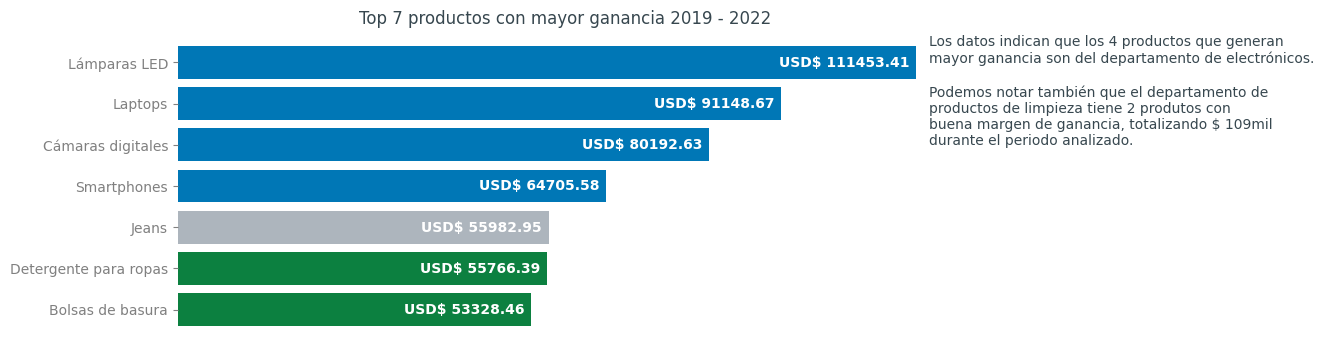

In [40]:
pregunta_2()

##**Pregunta 3**
##### Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

In [41]:
def pregunta_3():
  global df_ventas, df_ventas_limpio
  df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
  #dt es un decorador que me permite acceder a las propiedades de tiempo de un objeto tipo serie (columna de DataFrame), que contiene datos de fecha y hora
  df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year;

  #ELiminamos la columna fecha pedido axis=1 para indicar la eliminación de una columna
  df_ventas_año_region = df_ventas_año_region.drop('fecha_pedido', axis=1)

  #Creación de la tabla cruzada
  #las tablas cruzadas resumen y analizan la relación entre dos o más variables categóricas
  index = df_ventas_año_region['año']
  columns = df_ventas_año_region['region']
  total = df_ventas_año_region['total_venta']

  #aggfunc='sum' indican que se desea que los valores de la tabla cruzada se agreguen utilizando la función de suma
  df_ventas_año_region = pd.crosstab(index=index, columns=columns, values=total, aggfunc='sum')

  #print(df_ventas_año_region)

  #Recorro el df index que almacena con la ayuda de un listcomprenhension los años para quedarme con los valores unicos
  años = ['{}'.format(año) for año in index.drop_duplicates()]

  # ---- Visualización de datos ----

  colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

  bar_width = 0.5
  bar_space = 0.1

  #Para indicar que queremos las barras apiladas
  ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color = colores, width = bar_width)

  #Espacio entre las barras
  ax.set_xlim(-bar_space - 0.5, len(años) - bar_space)

  ax.set_title('Ventas del supermercado por región \n(2019-2022)', loc='left', color='#37474F')
  #Cambia la posicione de la leyenda
  ax.legend(loc='upper right', title="Región")

  #------ Trabajando con el contenido de los ejes --------
  ax.set_yticks([])
  indice = range(len(años))
  nombre_años = ['2019','2020','2021','2022',]
  ax.set_xticks(indice)
  #Girando el contenido de las etiquetas de x
  ax.set_xticklabels(nombre_años, rotation=0, color='#455A64')
  #ocultar cualquier etiqueta adicional en el índice del eje x.
  ax.xaxis.label.set_visible(False)
  #Eliminar lineas de los ejes
  ax.spines['bottom'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #ax.axis('off')

  #'{:,.0f}' especifica el formato de la cadena. En este caso, :, agrega comas como separadores de miles y .0f indica que no quieres decimales, redondeando el valor al entero más cercano.
  #Este formato formateará los números redondeados para que se vean como miles con comas separadoras.
  for container in ax.containers:
    labels = ['$ {:,.0f}K'.format((bar.get_height()/1000).round()) for bar in container.patches]
    ax.bar_label(container, label_type='center', labels= labels, color='white', fontweight='bold')

  # Agregar una línea vertical
  ax.axvline(x=bar_width * 6.6, ymax=0.8, color='#0091EA', linestyle='-', linewidth=0.8, label='Línea Vertical')

  #Primero sumamos cada region durante los años y ese total luego los sumamos para tener un valor total durante 2019-2022
  sumatoria_total = df_ventas_año_region.sum().sum()
  #Suma las regions Sureste, Noreste y Centro-Oeste
  #Primero creamos la serie con la sumatoria por region durante 2019-2022
  #Luego seleccionamos de la serie los valores que queremos sumar
  sumatoria_regiones = df_ventas_año_region.sum()
  sumatoria_regiones = sumatoria_regiones[['Sureste', 'Noreste', 'Centro-Oeste']].sum()
  #promedio
  prom = (sumatoria_regiones * 100)/sumatoria_total

  #Posicionamiento del texto
  #{:.2f} indica que vamos a tomar dos valores despues del punto
  ax.text(bar_width * 6.7, 700000, '{:.2f}%'.format(prom), fontweight='bold', color="#0D47A1", fontsize = 13)
  ax.text(bar_width * 6.7, 590000, 'de las ventas en el supermercado \nestan concentradas en las regiones', color="#0D47A1", fontsize = 10)
  ax.text(bar_width * 6.7, 540000, 'Sureste, Noreste', color="#0D47A1", fontsize = 10, fontweight='bold')
  ax.text(bar_width * 6.7, 540000, 'Sureste, Noreste', color="#0D47A1", fontsize = 10, fontweight='bold')
  ax.text(bar_width * 7.75, 540000, 'y', color="#0D47A1", fontsize = 10)
  ax.text(bar_width * 6.7, 490000, 'Centro - Oeste', color="#0D47A1", fontsize = 10, fontweight='bold')
  ax.text(bar_width * 7.63, 490000, 'desde el 2019', color="#0D47A1", fontsize = 10,)

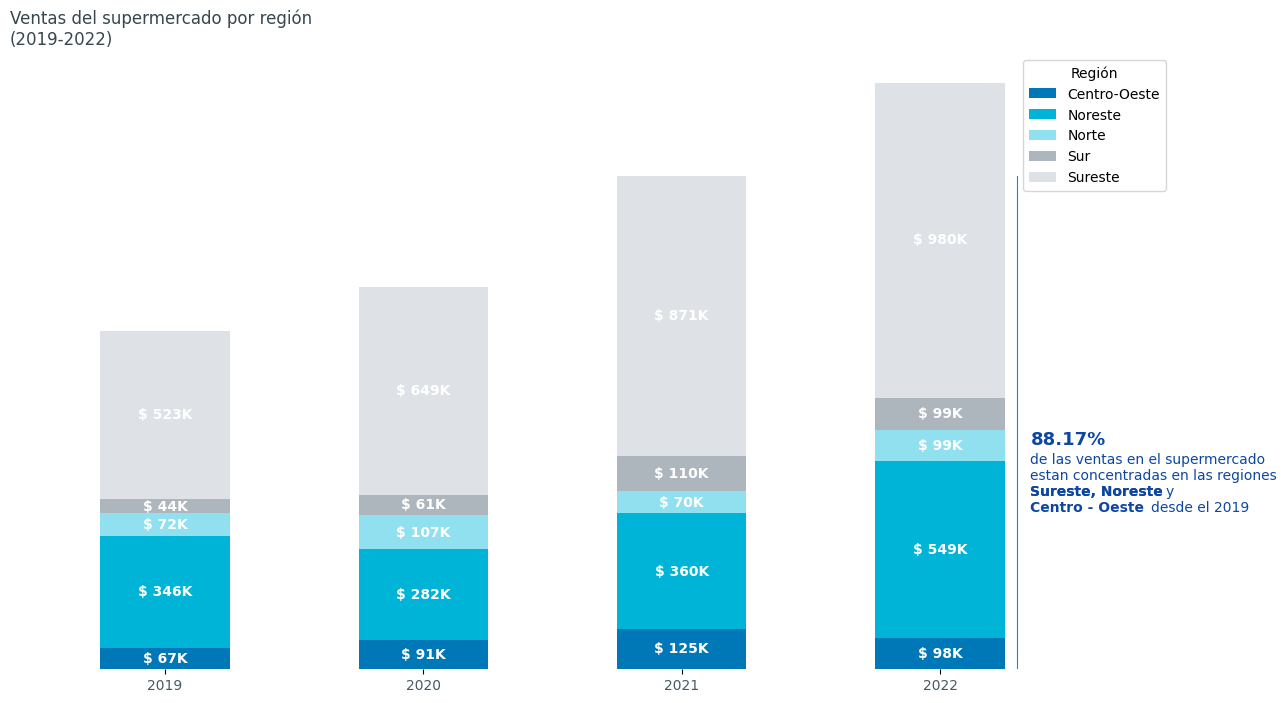

In [42]:
pregunta_3()

## **Pregunta 4**
##### ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

In [257]:
def pregunta_4():
  global df_df_ventas, df_ventas_limpio

  df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()

  indice = df_modo_envio['modo_envio']
  columna = df_modo_envio['segmento_cliente']

  df_modo_envio = pd.crosstab(index = indice, columns= columna).sort_values("B2B")
  #print(df_modo_envio)

  # ------------- Visualización -----------------

  fig, eje = plt.subplots(figsize = (10, 4))

  colores = ['#0077b6', '#CDDBF3']

  ejeX = df_modo_envio.index
  eje1Y = df_modo_envio['B2B']
  eje2Y = df_modo_envio['B2C']

  eje.barh(ejeX, eje1Y, color = colores[0])
  eje.barh(ejeX, eje2Y, left=eje1Y, color = colores[1])

  #Eliminación de las lineas de los ejes.
  eje.spines['top'].set_visible(False)
  eje.spines['bottom'].set_visible(False)
  eje.spines['right'].set_visible(False)
  eje.spines['left'].set_visible(False)

  eje.set_title('Método de envío más utilizado por los clientes (2019 - 2022)', color='#757575', fontsize=16)

  #'{:.0f}' especifica el formato de la cadena. En este caso, : genera el valor entero y .0f indica que no quieres decimales, redondeando el valor al entero más cercano.
  #Este formato formateará los números redondeados para que se vean como miles con comas separadoras.
  #container.patches es una lista que contiene todas las barras individuales del gráfico, con esta podemos obtener las propiedades de las barras
  for container in eje.containers:
    labels = ['{:.0f}'.format((bar.get_width())) for bar in container.patches]
    eje.bar_label(container, label_type='center', labels= labels, color='white', fontweight='bold')

  #Eliminacion de textos eje x
  eje.set_xticks([])
  eje.set_xticklabels([])
  eje.tick_params(axis='y', labelcolor = '#546E7A')

  #Espacio entre las barras
  space = 1
  plt.ylim(min(plt.ylim()[0] - space, 0), plt.ylim()[1] + space)

  #Textos arriba gráfico
  eje.text(0, 3.5, 'B2B', color="#0D47A1", fontsize = 10, fontweight='bold')
  eje.text(200, 3.55, '|', color="#757575", fontsize = 10)
  eje.text(260, 3.5, 'B2C', color="#CDDBF3", fontsize = 10, fontweight='bold')

  #Subtitulo
  eje.text(50 * 35, 4, 'En valores absolutos', color="#757575", fontsize = 10, fontweight='bold')

  #Calculo del porcentaje al que equivale el total de compras con entrega estandar
  total_envios = df_modo_envio.sum().sum()
  #.loc accedemos a las columnas por la etiqueta entrega estándar y sumamos sus contenidos
  total_estandar = df_modo_envio.loc['Entrega estándar'].sum()

  porcentaje = (total_estandar * 100)/total_envios

  #leyenda
  eje.text(max(plt.xlim()), 2, 'La', color="#0077b6", fontsize = 10)
  eje.text(max(plt.xlim()) + 100, 2, 'Entrega estándar', color="#0077b6", fontsize = 10, fontweight='bold')
  eje.text(max(plt.xlim()) * 1.21, 2, 'es el', color="#0077b6", fontsize = 10)
  eje.text(max(plt.xlim()) + 5, 1.4, 'método de envido preferido por \nlos clientes del Supermercado, representa ', color="#0077b6", fontsize = 10)
  eje.text(max(plt.xlim()) + 5, 1.1, '{:.1f}%'.format(porcentaje), color="#0077b6", fontsize = 10, fontweight = 'bold')
  eje.text(max(plt.xlim()) * 1.07, 1.1, 'de los pedidos, no hay diferencia entre', color="#0077b6", fontsize = 10)
  eje.text(max(plt.xlim()) + 5, 0.8, 'segmentos.', color="#0077b6", fontsize = 10)



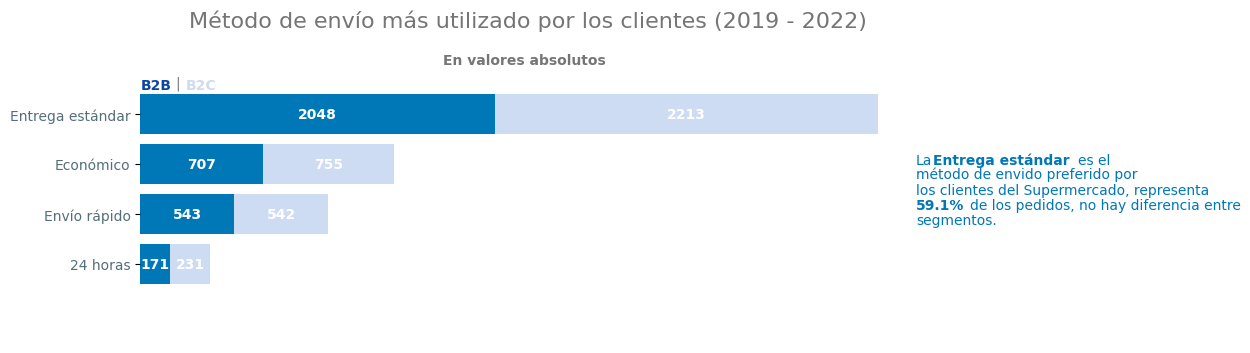

In [258]:
pregunta_4()

##Pregunta 5
#####¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?